C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

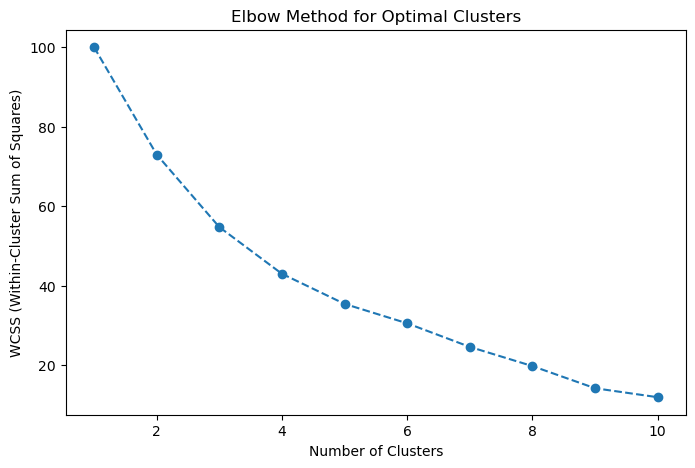

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Clustering completed and saved to 'shopping_mall_customers_clustered.csv'


In [9]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("shoppingmall_customer_segmentation.csv")

# Select relevant features for clustering
X = df[['Age', 'Annual_Income', 'Spending_Score', 'Gender', 'Membership_Duration']]

# Convert categorical variables to numerical
X = pd.get_dummies(X, columns=['Gender'], drop_first=True)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.title("Elbow Method for Optimal Clusters")
plt.show()

# Train K-Means clustering model (choose optimal_k based on the elbow method)
optimal_k = 5  # Adjust based on the Elbow Method plot
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Save the clustered data
df.to_csv("shopping_mall_customers_clustered.csv", index=False)

print("Clustering completed and saved to 'shopping_mall_customers_clustered.csv'")

In [7]:
df.head(10)

,Age,Annual_Income,Spending_Score,Gender,Membership_Duration,Cluster
0,65,22676,80,Female,5,0
1,34,100551,22,Male,10,2
2,37,37386,24,Male,1,1
3,45,95113,31,Male,2,1
4,28,95730,44,Male,0,1
5,61,84542,82,Male,6,4
6,60,82092,99,Female,7,4
7,62,46841,55,Female,9,0
8,41,79439,49,Female,3,4
9,43,92280,68,Female,9,4
